# Zeel Kiritbhai Nakrani (23158267)



# Kenil Savani (23080185)


# Janvi Ladola (23088219)


# Hardikkumar Vaghela (23076156)

In [3]:
import pandas as pd

# Load the Parquet file into a pandas DataFrame
file_path = 'C:/Users/acer/Downloads/ML-in-Finance-main/ML-in-Finance-main/data/cryptos/ETHUSD_2020-04-07_2022-04-06.parquet'
df = pd.read_parquet(file_path)

# Select the first 10000 rows
selected_df = df.head(35000)

In [4]:
selected_df

,VOLUME,VW,OPEN,CLOSE,HIGHT,LOW,t,TRANSACTIONS,DATE
0,6509.138870,171.9639,172.270,172.220000,172.29,171.953,1586282280000,34,2020-04-07 17:58:00
1,2030.296178,171.9591,172.280,172.310000,172.40,171.928,1586282340000,39,2020-04-07 17:59:00
2,1379.195752,172.0124,171.974,172.224027,172.44,171.974,1586282400000,64,2020-04-07 18:00:00
3,1070.755580,171.9985,172.041,172.260000,172.27,171.930,1586282460000,66,2020-04-07 18:01:00
4,323.613345,172.1549,172.250,171.980000,172.25,171.840,1586282520000,31,2020-04-07 18:02:00
...,...,...,...,...,...,...,...,...,...
34995,623.079340,212.6857,212.685,212.700000,212.92,212.640,1588381980000,10,2020-05-02 01:13:00
34996,1267.272281,212.4523,212.640,212.600000,212.76,212.356,1588382040000,40,2020-05-02 01:14:00
34997,164.314809,212.3276,212.590,212.325000,212.60,212.133,1588382100000,198,2020-05-02 01:15:00
34998,102.811154,212.6938,212.670,212.820000,212.89,212.370,1588382160000,53,2020-05-02 01:16:00


C:\Users\acer\AppData\Local\Temp\ipykernel_7912\2296491440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['DATE'] = pd.to_datetime(selected_df['DATE'])


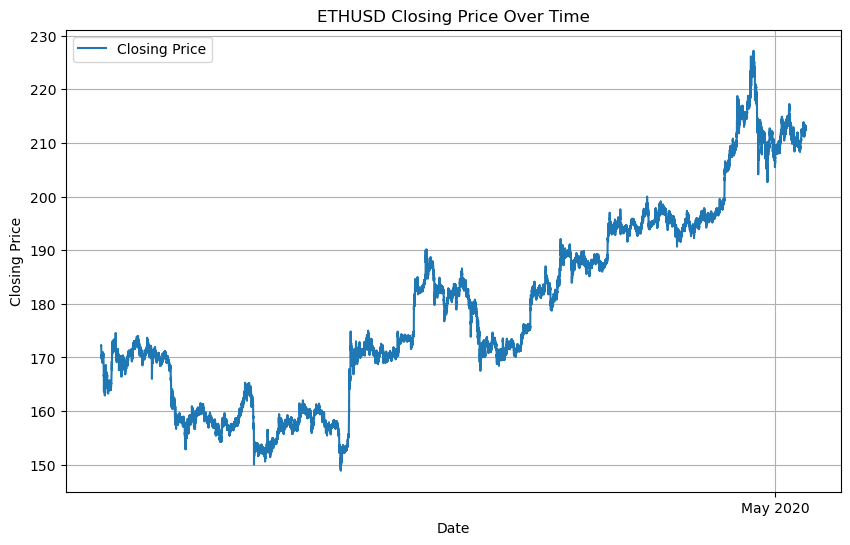

In [5]:
import matplotlib.pyplot as plt

from matplotlib.dates import MonthLocator, DateFormatter

# Convert 'DATE' column to datetime format
selected_df['DATE'] = pd.to_datetime(selected_df['DATE'])
# Visualize the data over time month-wise
plt.figure(figsize=(10, 6))
plt.plot(selected_df['DATE'], selected_df['CLOSE'], label='Closing Price')
plt.title('ETHUSD Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
# Set x-axis ticks to show only the months
months = MonthLocator()
months_fmt = DateFormatter("%b %Y")
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)
plt.legend()
plt.grid(True)
plt.show()

# Shannon's Entropy

C:\Users\acer\AppData\Local\Temp\ipykernel_7912\2317009404.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['DATE'] = pd.to_datetime(selected_df['DATE'])


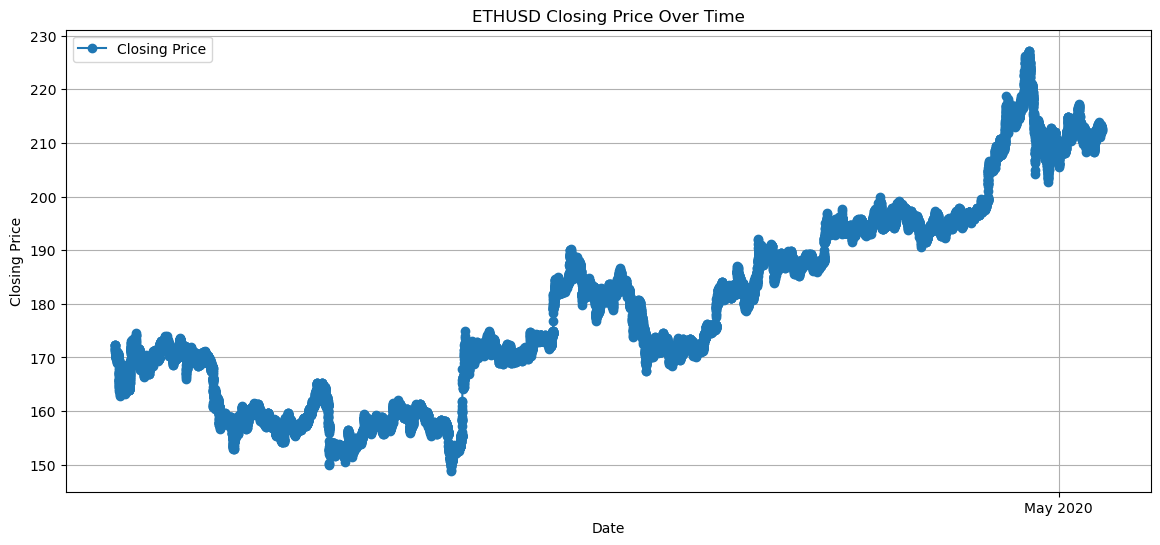

Entropy of Closing Price: 10.458201273778576


In [10]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter



# Convert 'DATE' column to datetime format
selected_df['DATE'] = pd.to_datetime(selected_df['DATE'])

# Calculate entropy of the closing price
closing_price_entropy = entropy(selected_df['CLOSE'].dropna())

# Visualize the data over time month-wise
plt.figure(figsize=(14, 6))
plt.plot(selected_df['DATE'], selected_df['CLOSE'], label='Closing Price', marker='o', linestyle='-')
plt.title('ETHUSD Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Set x-axis ticks to show only the months
months = MonthLocator()
months_fmt = DateFormatter("%b %Y")
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)

plt.legend()
plt.grid(True)
plt.show()

print(f"Entropy of Closing Price: {closing_price_entropy}")

# The entropy of a dataset measures the unpredictability or disorder within that dataset. In the context of financial data like the closing prices of a stock or cryptocurrency, entropy can be interpreted as a measure of the variability or randomness in the price movements.

# higher entropy values indicate greater unpredictability and variability in the data, suggesting that the closing prices exhibit more chaotic or less structured behavior. In the context of financial data, this could mean that the closing prices have a higher degree of randomness or are less influenced by known patterns.

# Maximum Likelihood Estimation

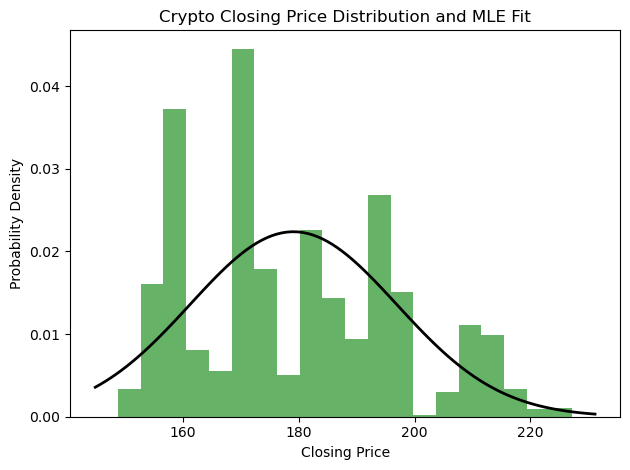

MLE Estimates:
Mean: 179.1111351980037
Standard Deviation: 17.82895977677631


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# Generate synthetic crypto closing price data
#np.random.seed(42)  # for reproducibility
#crypto_data = np.random.normal(loc=100, scale=10, size=100)

# Plot the histogram of the data
plt.hist(selected_df['CLOSE'], bins=20, density=True, alpha=0.6, color='g')

# Fit a normal distribution to the data using MLE
mu_init = np.mean(selected_df['CLOSE'])
sigma_init = np.std(selected_df['CLOSE'])

# Define the negative log-likelihood function for a normal distribution
def neg_log_likelihood(params, data):
    mu, sigma = params
    ll = -np.sum(norm.logpdf(data, mu, sigma))
    return ll

# Use scipy's minimize function to find MLE estimates
result = minimize(neg_log_likelihood, [mu_init, sigma_init], args=(selected_df['CLOSE'],))
mu_mle, sigma_mle = result.x

# Plot the MLE-fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_mle, sigma_mle)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Closing Price')
plt.ylabel('Probability Density')
plt.title('Crypto Closing Price Distribution and MLE Fit')
plt.tight_layout()
# Show the plot
plt.show()

# Display MLE estimates
print("MLE Estimates:")
print("Mean:", mu_mle)
print("Standard Deviation:", sigma_mle)

# Risk and Volatility: Mean and standard deviation are crucial for understanding the risk and volatility associated with the asset's price movements. Mean represents the average or expected value of the closing prices, while standard deviation measures the dispersion or variability around the mean. Both are essential in assessing the potential risk and uncertainty in the crypto market.

# This code iterates over each week, extracts the closing prices, fits a  distribution to the closing prices using Maximum Likelihood Estimation (MLE), and then plots the histogram of closing prices along with the fitted gamma distribution for each month.


# In crypto data analysis, MLE can be used to estimate parameters such as the mean and standard deviation (for a normal distribution) or the mean and volatility (for a log-normal distribution). These parameters can provide insights into the central tendency and variability of closing prices, which can be valuable for risk management, portfolio optimization, and other financial analyses.

# Lempel-Ziv compression

In [14]:
import numpy as np
import zstandard as zstd


crypto_data = selected_df['CLOSE'].to_numpy()

# Convert the data to bytes (assuming it's a NumPy array of floats)
crypto_data_bytes = crypto_data.tobytes()

# Compress the data using Lempel-Ziv compression
compressor = zstd.ZstdCompressor()
compressed_data = compressor.compress(crypto_data_bytes)

# Decompress the data
decompressed_data = zstd.decompress(compressed_data)

# Convert the decompressed data back to a NumPy array
decompressed_crypto_data = np.frombuffer(decompressed_data, dtype=np.float64)

# Print some information
print("Original Data Size:", len(crypto_data_bytes))
print("Compressed Data Size:", len(compressed_data))
print("Compression Ratio:", len(crypto_data_bytes) / len(compressed_data))

# Check if the decompressed data matches the original data
print("Data Matches:", np.allclose(crypto_data, decompressed_crypto_data))

Original Data Size: 280000
Compressed Data Size: 90713
Compression Ratio: 3.08665792113589
Data Matches: True


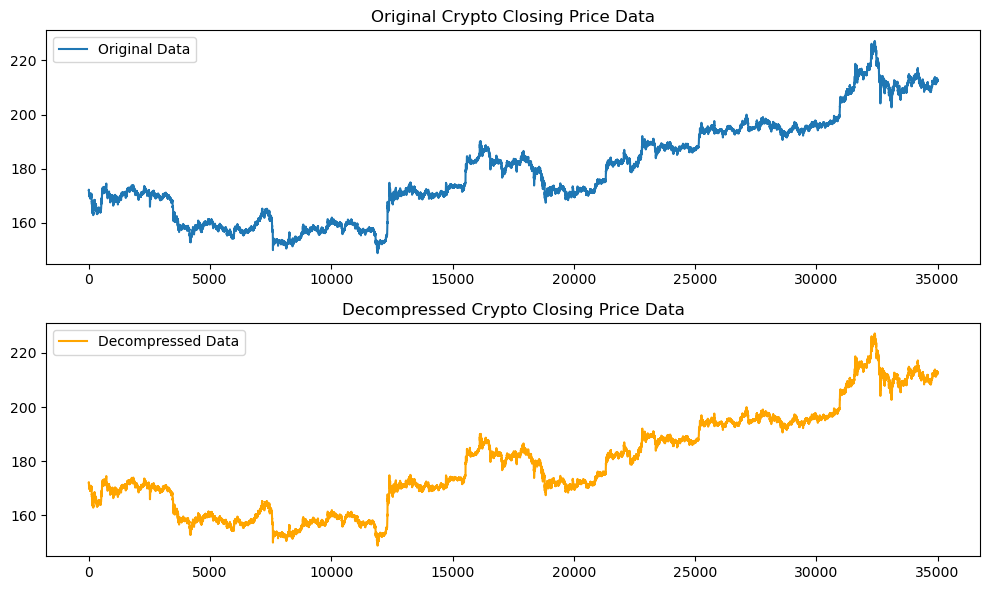

In [16]:
import numpy as np
import zstandard as zstd
import matplotlib.pyplot as plt

# Assuming 'selected_df' is a DataFrame with a 'closing_price' column
crypto_data = selected_df['CLOSE'].to_numpy()

# Convert the data to bytes (assuming it's a NumPy array of floats)
crypto_data_bytes = crypto_data.tobytes()

# Compress the data using Lempel-Ziv compression
compressor = zstd.ZstdCompressor()
compressed_data = compressor.compress(crypto_data_bytes)

# Decompress the data
decompressed_data = zstd.decompress(compressed_data)

# Convert the decompressed data back to a NumPy array
decompressed_crypto_data = np.frombuffer(decompressed_data, dtype=np.float64)

# Visualize the original and decompressed data
plt.figure(figsize=(10, 6))

# Plot original data
plt.subplot(2, 1, 1)
plt.plot(crypto_data, label='Original Data')
plt.title('Original Crypto Closing Price Data')
plt.legend()

# Plot decompressed data
plt.subplot(2, 1, 2)
plt.plot(decompressed_crypto_data, label='Decompressed Data', color='orange')
plt.title('Decompressed Crypto Closing Price Data')
plt.legend()

plt.tight_layout()
plt.show()

# For each week, the closing prices are converted into a string of symbols.


# Lempel-Ziv compression is applied to the symbol sequence, and the complexity is calculated as the ratio of the length of the compressed data to the length of the original sequence.

# Keep in mind that the Lempel-Ziv compression is more effective when there are repeated patterns or sequences in the data. In financial time series data like closing prices, which may not have a lot of repeated patterns, the compression may not result in a substantial reduction in size. The visualization is mainly for illustrative purposes to show the impact on the data after compression and decompression.

# The Lempel-Ziv complexity can provide insights into the compressibility of the closing price sequence. Higher complexities may indicate more unpredictable or complex behavior in the financial time series. It's important to note that this complexity measure is just one way to assess the nature of the data, and interpretation should be done in the context of the specific characteristics of your financial data.